In [22]:
from sklearn.preprocessing import StandardScaler

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [102]:
from sklearn.metrics import confusion_matrix

In [146]:
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('training_sample.csv')

In [194]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

In [295]:
class Classification_type(object):
    
    def __init__(self,dataset):
        self.dataset = dataset
        self.y = dataset['flag'].values
        self.X = dataset[['seq', 'payment', 'guesses', 'mean_guess', 'std_guess', 'mean_p', 'std_p', 'last_3_p_mean']]
        self.n_out_neurons = self.dataset['flag'].nunique()
        
        # Y edited
        self.dummy_y = None
        
        # X edited
        self.X_scaled = None
    
        # Classification NN
        self.classifier = Sequential()
        self.classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
        #self.classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
        self.classifier.add(Dense(units = self.n_out_neurons,  activation = 'softmax'))
        self.classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
        
        # Prediction
        self.y_pred = None
        
        # Score by Seq
        self.score_seq_dt = None
    
    def encode_y(self, y):
        encoder = LabelEncoder()
        encoder.fit(y)
        encoded_y = encoder.transform(y)
        return(np_utils.to_categorical(encoded_y))
        
    def scaling_x(self, x):
        sc = StandardScaler()
        return(sc.fit_transform(x))
        
    def classification_nn(self):
        
        # Scale and Encode if needed
        if self.dummy_y == None: 
            self.dummy_y = self.encode_y(self.y)
        if self.X_scaled == None:
            self.X_scaled = self.scaling_x(self.X.values)
        
        # Classification
        self.classifier.fit(self.X_scaled, self.dummy_y, batch_size = 100, epochs = 100, verbose=0)
        
        # Add predicted Value to dataset
        y = self.classifier.predict(self.X_scaled)
        self.dataset['y_pred'] = self.prob_to_pred(y)
        self.dataset.loc[(self.dataset['y_pred'] == self.dataset['flag']) , 'Score'] = 1 
        self.dataset.loc[(self.dataset['y_pred'] != self.dataset['flag']), 'Score'] = 0 
        
        print("Model is trained")
    
    def prob_to_pred(self, y_output):
        # Converts prediction matrix to actual prediction
        out_ = []
        for i in range(0, y_output.shape[0]):
            out_.append((y_output[i].argmax(axis = 0) + 1))
        return(out_)
    
    def confusion_matrix(self, y_pred_, y_actual, normalize = True):
        c = confusion_matrix(y_actual, y_pred_)
        
        if normalize == True:
            c = c / c.astype(np.float).sum(axis=1)
        return(c)
    
    def overall_score(self, score_type = 'Training',y_act = None, y_pred = None):
        if score_type == 'Training':
            return(self.dataset["Score"].sum()/self.dataset["Score"].count())
        else:
            y_eval = (y_act == y_pred)
            return(y_eval[y_eval == True].shape[0]/y_eval.shape[0])
    
    def score_by_seq(self):
        self.score_seq_dt = self.dataset.groupby("seq")["Score"].sum()/self.dataset.groupby("seq")["Score"].count()
        return(self.score_seq_dt)
    
    def plot_score_by_seq(self): 
        if  all(self.score_seq_dt == None):
            self.score_seq_dt = self.dataset.groupby("seq")["Score"].sum()/self.dataset.groupby("seq")["Score"].count()
        
        plt.plot(range(0,len(self.score_seq_dt)), self.score_seq_dt , color = '#001871')
        plt.xlabel('N_play', fontsize=15)
        plt.ylabel('% Correctly classified', fontsize=15)
        plt.title('% of correctly classified cases depending on n_play', fontsize=20)
        plt.rcParams["figure.figsize"] = [10,7]
        plt.show() 
    
    def predict_value(self, X_input):
        return(classifier.predict(self.scaling_x(X_input)))
        

In [296]:
a = Classification_type(dataset)

In [297]:
a.classification_nn()

Model is trained


In [256]:
a.score_by_seq()

seq
0     0.466333
1     0.544797
2     0.597106
3     0.626600
4     0.651085
5     0.678909
6     0.701169
7     0.723984
8     0.723984
9     0.731219
10    0.737340
11    0.745687
12    0.750139
13    0.761269
14    0.759043
15    0.764051
16    0.771842
17    0.777963
18    0.780746
19    0.778520
20    0.776850
21    0.781302
22    0.783528
23    0.790762
24    0.790762
25    0.789649
26    0.792988
27    0.796884
28    0.797440
29    0.793545
30    0.799110
31    0.800223
32    0.800223
33    0.803561
34    0.809683
35    0.809683
36    0.810239
37    0.814135
38    0.819143
39    0.819699
40    0.827490
41    0.824708
42    0.828603
43    0.827490
44    0.830273
45    0.830273
46    0.833055
47    0.830273
48    0.834168
49    0.838620
Name: Score, dtype: float64

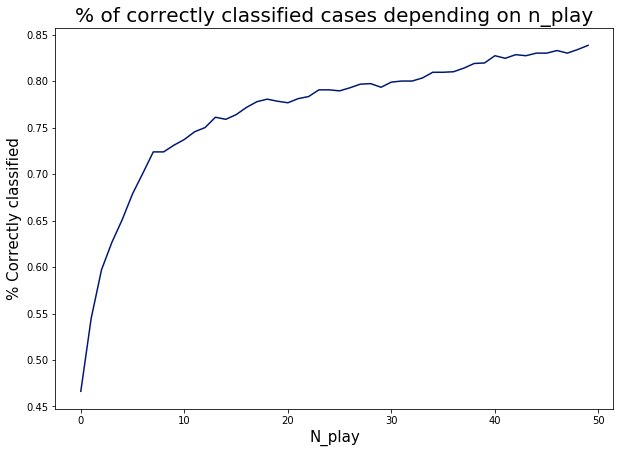

In [257]:
a.plot_score_by_seq()

In [251]:
all(a.score_seq_dt == None)

False

In [218]:
# Test on Testing sample

In [224]:
dataset_test = pd.read_csv('test_sample.csv')

In [290]:
y_test = dataset_test.iloc[:,2].values
X_test = dataset_test[['seq', 'payment', 'guesses', 'mean_guess','std_guess', 'mean_p', 'std_p', 'last_3_p_mean']]

In [228]:
X_test.values

array([[  0.        ,   0.        ,  67.        , ...,   0.        ,
          0.        ,   0.        ],
       [  1.        ,   0.        ,  75.        , ...,   0.        ,
          0.        ,   0.        ],
       [  2.        ,   0.        ,  55.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [ 47.        ,  45.        ,  45.        , ...,  24.39583333,
         22.61244088,  24.33333333],
       [ 48.        ,  48.        ,  48.        , ...,  24.87755102,
         22.62798759,  40.33333333],
       [ 49.        ,   0.        ,  93.        , ...,  24.38      ,
         22.66970666,  31.        ]])

In [302]:
y_test.nunique()

AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

In [288]:
y_test_pred = a.predict_value(X_test.values)
y_test_pred_2 = a.prob_to_pred(y_test_pred )

In [ ]:
y_pred = classifier.predict(X2_test)

In [272]:
(y_test_pred_2 == y_test).shape[0]

14850

In [282]:
((y_test_pred_2 == y_test) == True).shape[0]

14850

In [278]:
azta = (y_test_pred_2 == y_test)


In [281]:
azta[azta == True].shape[0]

11311

In [286]:
a.confusion_matrix(y_test_pred_2,y_test, normalize=True)

array([[ 0.97393939,  0.01030303,  0.01575758],
       [ 0.02020202,  0.70888889,  0.27090909],
       [ 0.02909091,  0.36868687,  0.60222222]])

In [298]:
a.overall_score(score_type = 'Test', y_act = y_test, y_pred = y_test_pred_2)

0.7616835016835016

In [299]:
a.overall_score()

0.76712298274902613

In [294]:
y_eval = (y_test == y_test_pred_2)
y_eval[y_eval == True].shape[0]/y_eval.shape[0]

0.7616835016835016

In [293]:
(y_test == y_test_pred_2)

array([ True,  True,  True, ..., False, False, False], dtype=bool)